## Importing Libraries and Data and Data cleaning

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/content/Automobile.csv")
print(data.head())

   symboling normalized-losses         make fuel aspiration num-of-doors  \
0          3                 ?  alfa-romero  gas        std          two   
1          3                 ?  alfa-romero  gas        std          two   
2          1                 ?  alfa-romero  gas        std          two   
3          2               164         audi  gas        std         four   
4          2               164         audi  gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city_mpg  \


Cleaning the data by replacing '?' with missing values (NaN), converting specific columns ('price', 'horsepower', 'engine-size', 'curb-weight') to numeric values, and dropping rows with missing values in these columns.

In [147]:
data.replace('?', pd.NA, inplace=True)

data['price'] = pd.to_numeric(data['price'], errors='coerce')
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
data['engine-size'] = pd.to_numeric(data['engine-size'], errors='coerce')
data['curb-weight'] = pd.to_numeric(data['curb-weight'], errors='coerce')

data = data.dropna(subset=['price', 'horsepower', 'engine-size', 'curb-weight'])

## Visualization of Automobile data using Matplotlib

Plotting a bar chart to visualize the frequency distribution of horsepower values by grouping them into predefined bins (ranges).

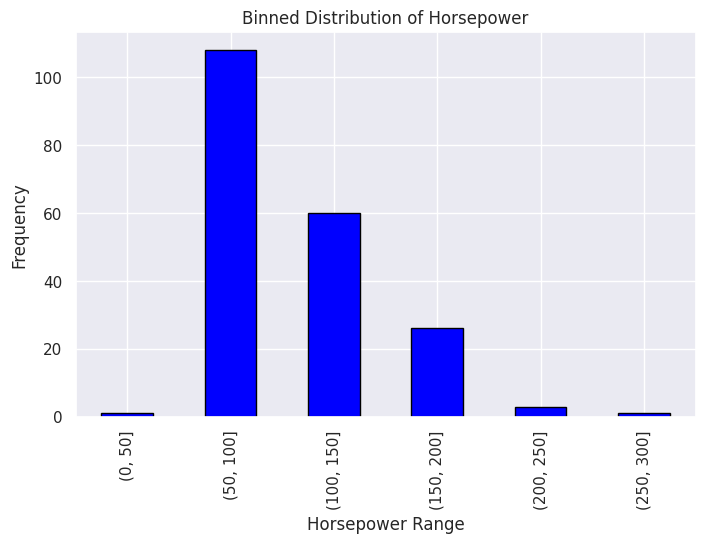

In [148]:
bins = [0, 50, 100, 150, 200, 250, 300]
data['horsepower_binned'] = pd.cut(data['horsepower'], bins=bins)
horsepower_counts = data['horsepower_binned'].value_counts()
plt.figure(figsize=(8, 5))
horsepower_counts.sort_index().plot(kind='bar', color='blue', edgecolor='black')
plt.title('Binned Distribution of Horsepower')
plt.xlabel('Horsepower Range')
plt.ylabel('Frequency')
plt.show()

Plotting a scatter plot of engine size vs. price

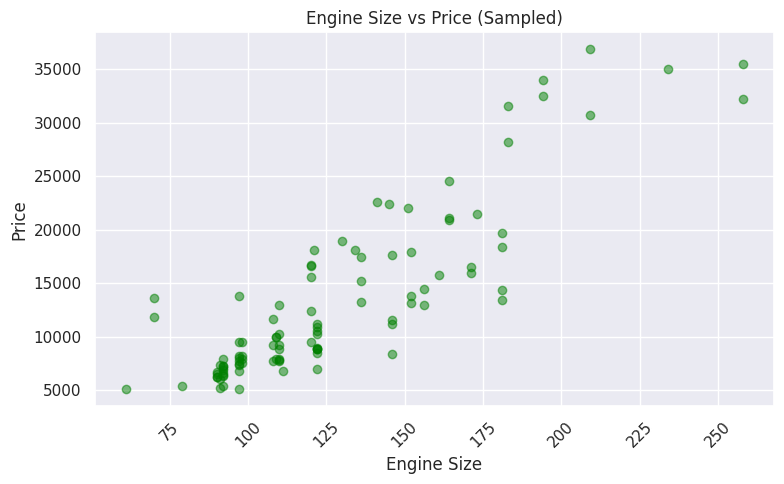

In [149]:
data_sampled = data.sample(100, random_state=1)
plt.figure(figsize=(8, 5))
plt.scatter(data_sampled['engine-size'], data_sampled['price'], color='green', alpha=0.5)
plt.title('Engine Size vs Price (Sampled)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Plotting a line chart showing the average price based on curb weight, with curb weight on the x-axis and average price on the y-axis.

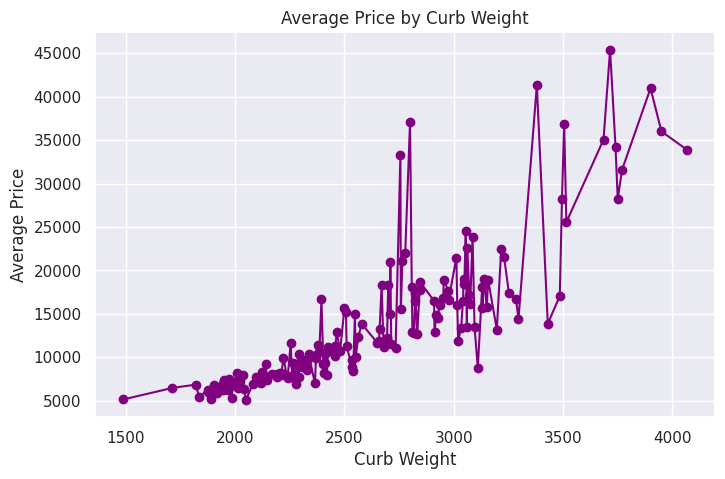

In [150]:
cw_price_avg = data.groupby('curb-weight')['price'].mean().reset_index()
plt.figure(figsize=(8, 5))
plt.plot(cw_price_avg['curb-weight'], cw_price_avg['price'], linestyle='-', marker='o', color='purple')
plt.title('Average Price by Curb Weight')
plt.xlabel('Curb Weight')
plt.ylabel('Average Price')
plt.show()

Plotting a bar chart to display the average price for each fuel type, with fuel type on the x-axis and average price on the y-axis.

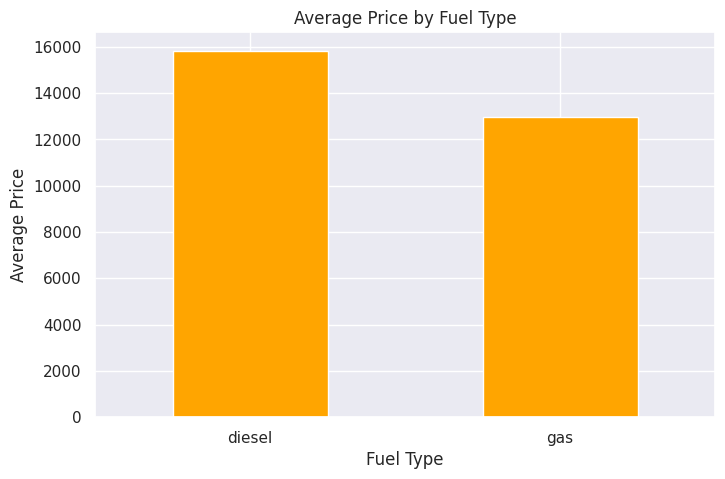

In [151]:
avg_price_by_fuel = data.groupby('fuel')['price'].mean()
plt.figure(figsize=(8, 5))
avg_price_by_fuel.plot(kind='bar', color='orange')
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

Plotting a pie chart to show the distribution of different body styles, with percentage labels for each body style category.

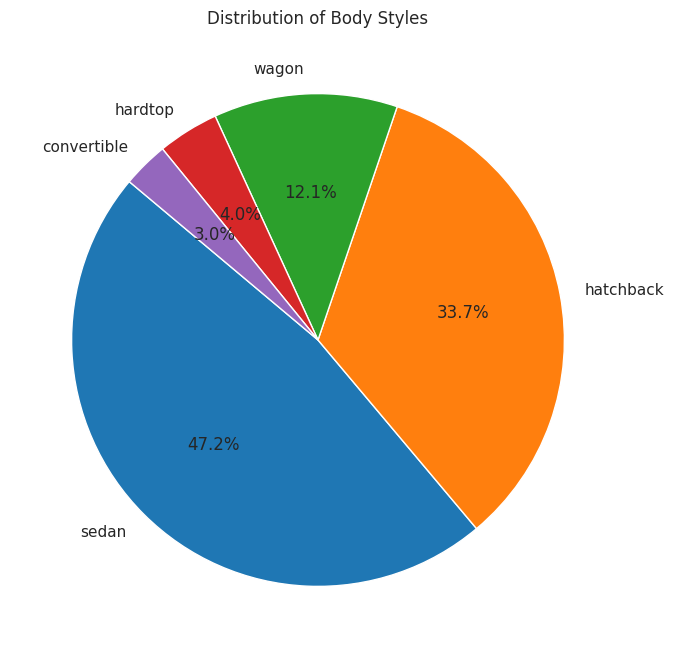

In [152]:
body_style_counts = data['body-style'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(body_style_counts, labels=body_style_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Distribution of Body Styles')
plt.show()

## Visualization of Automobile data using Seaborn


Plotting a boxplot to visualize the distribution of price based on fuel type, with fuel type on the x-axis and price on the y-axis.

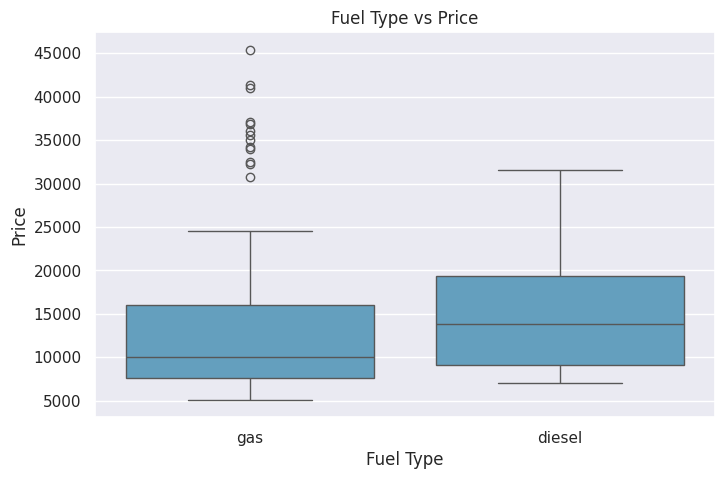

In [153]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='fuel', y='price', data=data)
plt.title('Fuel Type vs Price')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

Plotting a horizontal count plot to show the top 10 car makes based on frequency, with the count on the x-axis and car make on the y-axis.

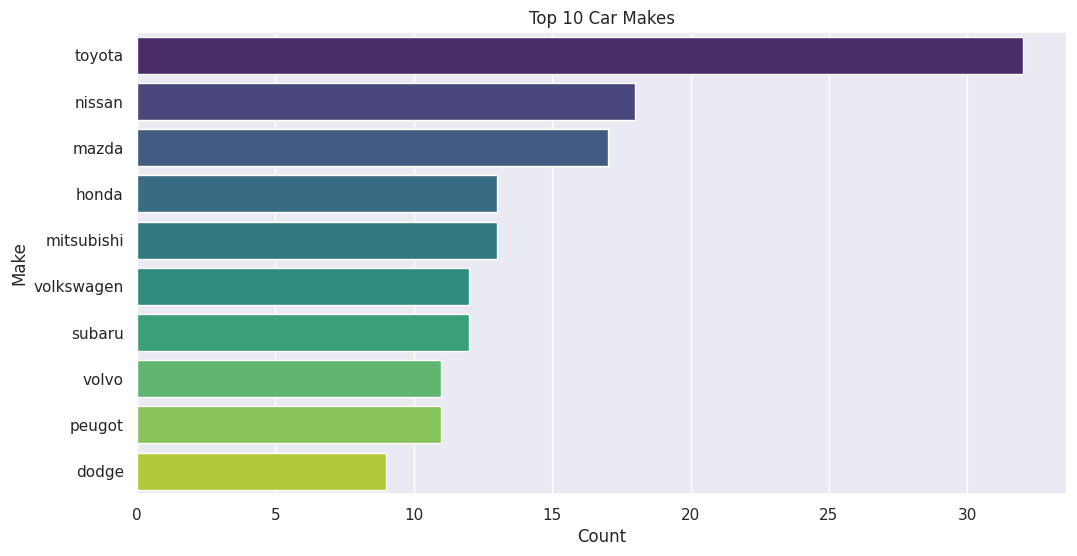

In [155]:
top_10_makes = data['make'].value_counts().nlargest(10).index
filtered_data = data[data['make'].isin(top_10_makes)]
plt.figure(figsize=(12, 6))
sns.countplot(y='make', data=filtered_data, order=top_10_makes, palette='viridis')
plt.title('Top 10 Car Makes')
plt.xlabel('Count')
plt.ylabel('Make')
plt.show()

Plotting a violin plot to visualize the price distribution across different drive wheels categories, with drive wheels on the x-axis and price on the y-axis.

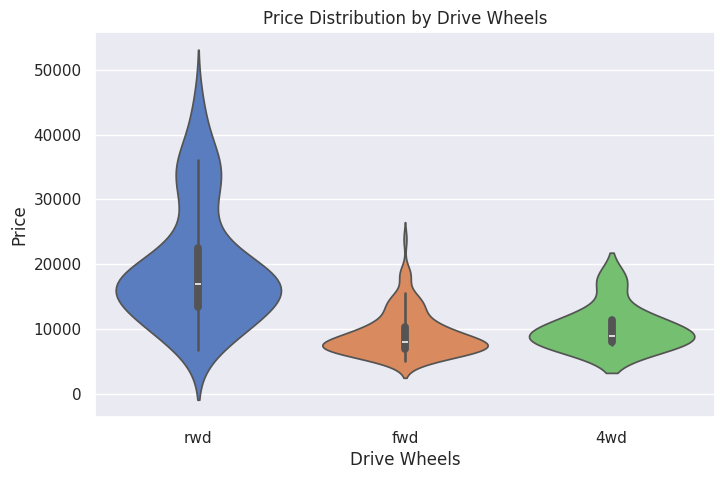

In [156]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='drive-wheels', y='price', data=data, palette='muted')
plt.title('Price Distribution by Drive Wheels')
plt.xlabel('Drive Wheels')
plt.ylabel('Price')
plt.show()

Plotting a pairplot of sampled numerical columns (horsepower, price, engine size, and curb weight) to visualize the relationships between them, with kernel density estimates on the diagonal and transparency applied to the scatter plots.

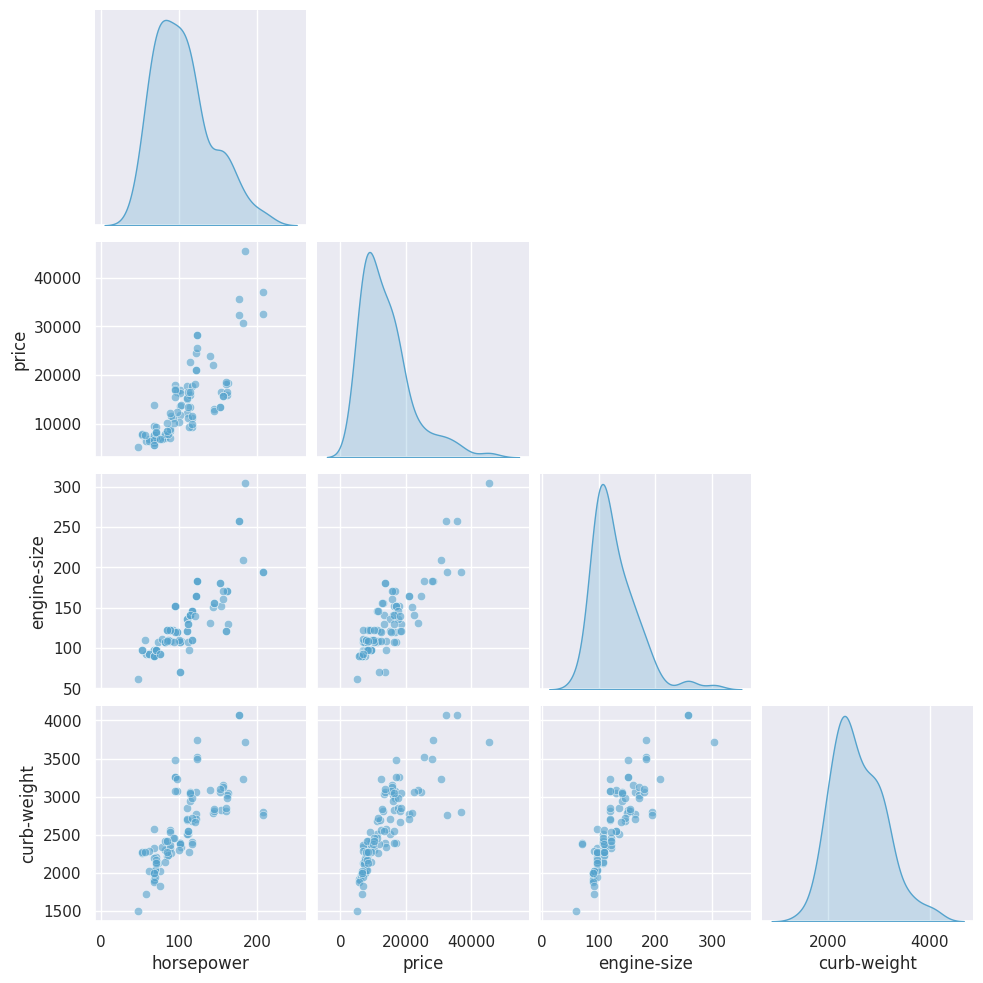

In [157]:
numerical_columns = ['horsepower', 'price', 'engine-size', 'curb-weight']
data_sampled_pairplot = data[numerical_columns].sample(100, random_state=2)
sns.pairplot(data_sampled_pairplot, diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})
plt.show()